In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "7QR7t13SCnk9NqsZfsxA7TLWG"
Consumer_Secret_Key = "UG5fMtsvhfed60Ph8x3XioOMI6GZoc1PVp1xOrOvyU4P7ZkoUI"
Access_Token = "1169119459400978435-AFfZGZbq2pPUS0kfDwOOM8tFd2amR3"
Access_Token_Secret = "kx12HUgzobDE89Iqd1gNG1r2cpfBW5oReWR1rgFFqXC3I"

In [4]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [9]:
posts = api.user_timeline(screen_name="pilkada", count = 100,  lang = "en", tweet_mode = "extended")

#print the last 5 tweets
print ("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent tweets:

1)Google Alerts RSS delivery is temporarily not available. If you would like to continue receiving Google Alerts ...

2)BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http://t.co/FrGXDNQvEK http://t.co/NnWwpIeqZa

3)Google Reader is no longer available. To continue receiving Google Alerts, go to http://t.co/8pnJPmEA3a...

4)Hitung Cepat Pilkada Kota Bandung, Calon PKS-Gerindra Unggul. Pasangan Ridwan ...www.youtube.com/watch?v=wHWCCz8KeyI http://t.co/fGL7EfZTbm

5)Powerful Presentations Herman - Daud http://t.co/GVSvFvdln4 http://t.co/fbfuSmC1gd



In [10]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Google Alerts RSS delivery is temporarily not ...
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...
2,Google Reader is no longer available. To conti...
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G..."
4,Powerful Presentations Herman - Daud http://t....


In [11]:
def cleanTxt(text):
  text = re.sub('@[A-Za - z0-9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) #Removing '#' has tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\s+', '', text) #Removing hyperlink
  
  return text

  #clean the tweets
  df['Tweets'] = df['Tweets'].apply(cleanTxt)

  #show the cleaned tweets
  df 

In [16]:
#creat a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creat a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creat two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Google Alerts RSS delivery is temporarily not ...,0.400000,-0.200000
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...,0.000000,0.000000
2,Google Reader is no longer available. To conti...,0.400000,0.400000
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G...",0.000000,0.000000
4,Powerful Presentations Herman - Daud http://t....,1.000000,0.300000
...,...,...,...
95,"JUAL: spanduk pilkada, umbul-umbul, bendera..m...",0.000000,0.000000
96,Prijanto Saya Tak Akan Ikut Pilkada. fullscree...,0.000000,0.000000
97,"The State News Agency Antara, quotes “Cok Ace”...",0.000000,0.000000
98,Buy HasilPilkada Just $0.11 per track Full Alb...,0.431145,0.110269


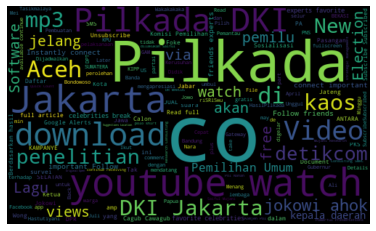

In [18]:
#word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
#create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df ['Analysis'] = df['Polarity'].apply(getAnalysis)
#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Google Alerts RSS delivery is temporarily not ...,0.400000,-0.200000,Negative
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...,0.000000,0.000000,Neutral
2,Google Reader is no longer available. To conti...,0.400000,0.400000,Positive
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G...",0.000000,0.000000,Neutral
4,Powerful Presentations Herman - Daud http://t....,1.000000,0.300000,Positive
...,...,...,...,...
95,"JUAL: spanduk pilkada, umbul-umbul, bendera..m...",0.000000,0.000000,Neutral
96,Prijanto Saya Tak Akan Ikut Pilkada. fullscree...,0.000000,0.000000,Neutral
97,"The State News Agency Antara, quotes “Cok Ace”...",0.000000,0.000000,Neutral
98,Buy HasilPilkada Just $0.11 per track Full Alb...,0.431145,0.110269,Positive


In [20]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)Google Alerts RSS delivery is temporarily not available. If you would like to continue receiving Google Alerts ...

2)A comment on JG website on Pilkada Jakarta: And I thought that the Obama VS Romney drama in the US is bad enough... http://t.co/eC6S64im



In [22]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

1)Google Reader is no longer available. To continue receiving Google Alerts, go to http://t.co/8pnJPmEA3a...

2)Powerful Presentations Herman - Daud http://t.co/GVSvFvdln4 http://t.co/fbfuSmC1gd

3)Powerful Presentations TGB - AMIN NTB http://t.co/9DV2tturqY http://t.co/zn4ckw4Efd

4)[Download File] Lagu pilkada jokowi ahok free download mp3, gratis download lagu Lagu pilkada jokowi ahok you ... http://t.co/RFr0KzXnDN

5)[Download File] Pilkada jakarta plus busway free download mp3, gratis download lagu Pilkada jakarta plus buswa... http://t.co/B2i7Lsibm5

6)Canda saat Pilkada DKI Jakarta 2012 setelah hasil Quick Count menunjukan JOKOWI-AHOK menang 43 % suara lawan FOK... http://t.co/DS9xcWju

7)Free Pilkada Tasikmalaya mp3 download, You just click on the Download link. Easy way to take Pilkada Tasikmalaya... http://t.co/627PSwIK

8)Instantly connect to what's most important to you. Follow your friends, experts, favorite celebrities, and break... http://t.co/

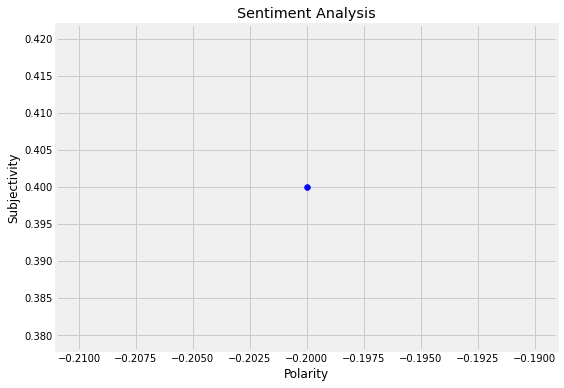

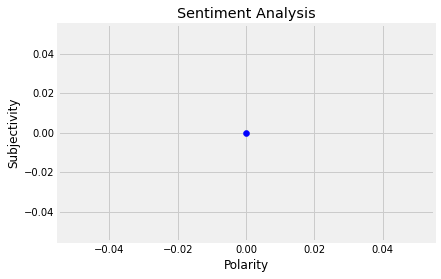

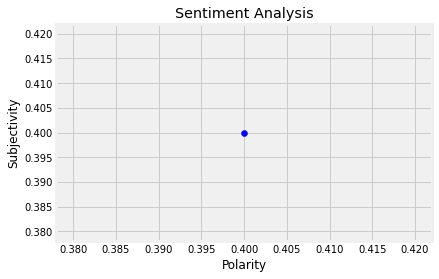

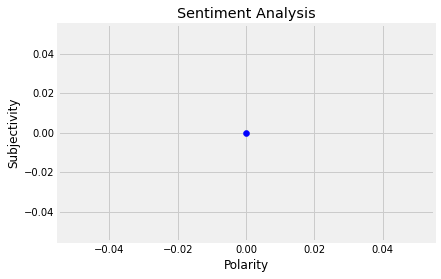

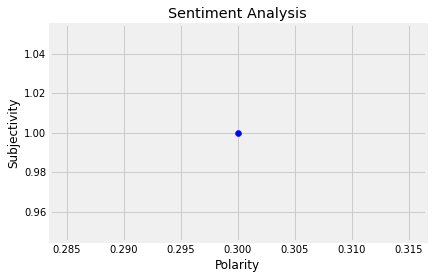

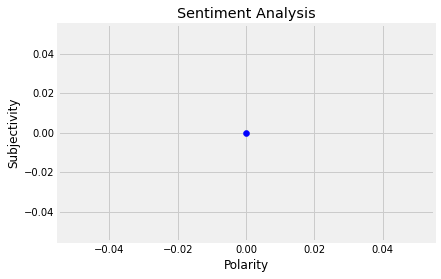

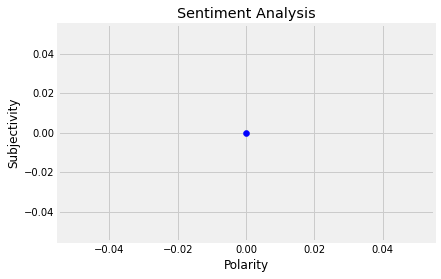

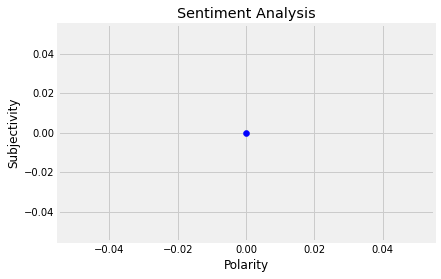

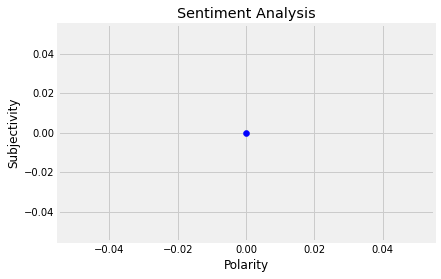

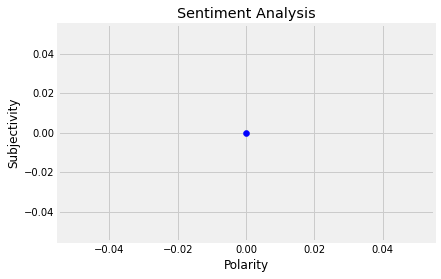

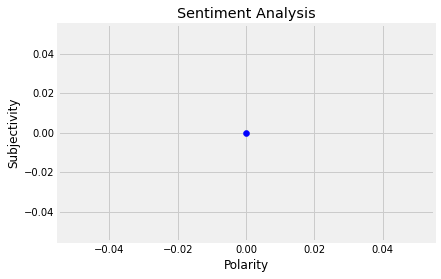

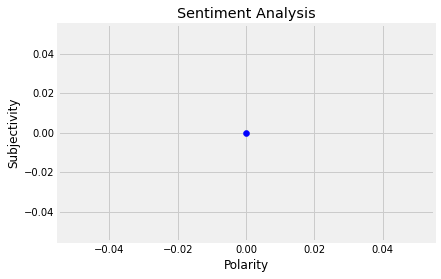

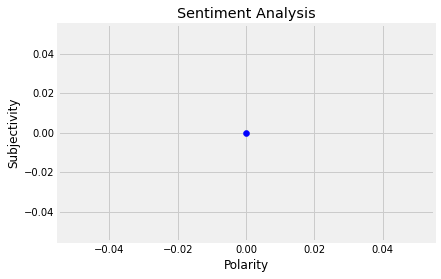

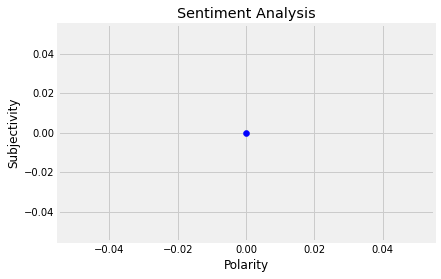

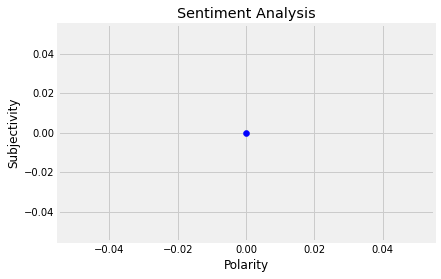

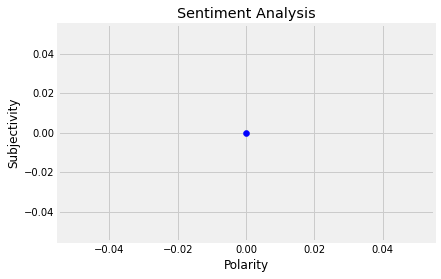

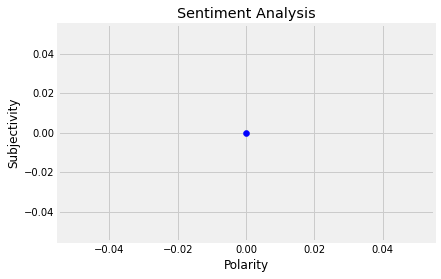

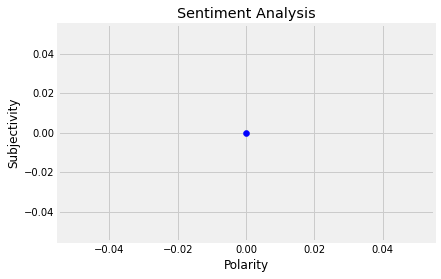

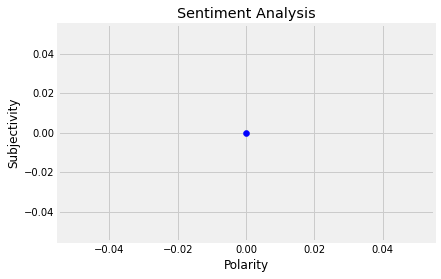

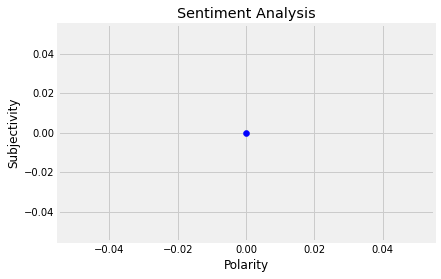

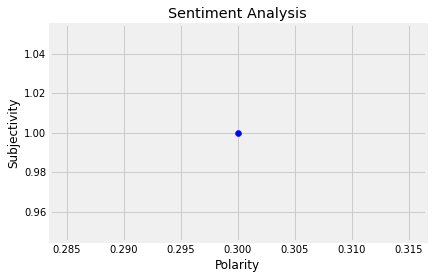

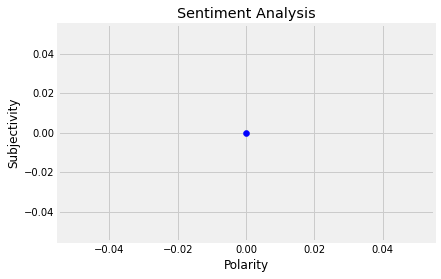

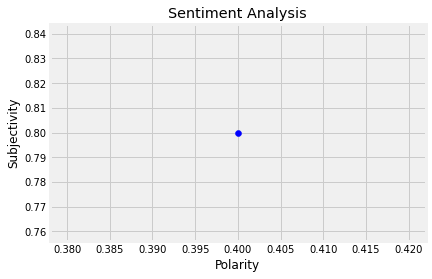

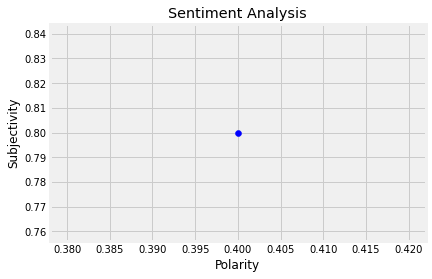

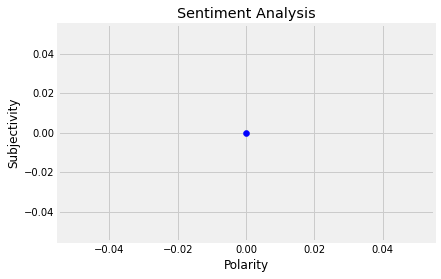

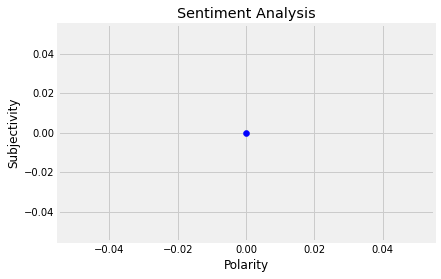

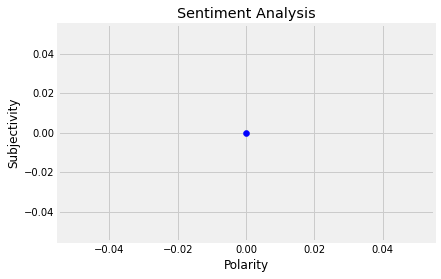

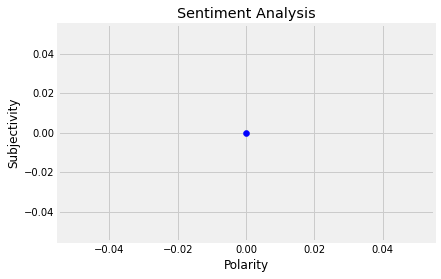

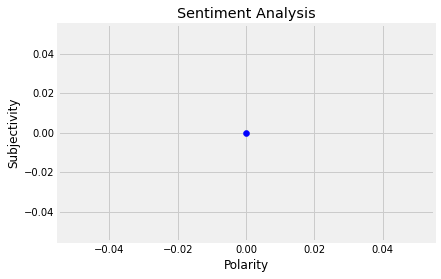

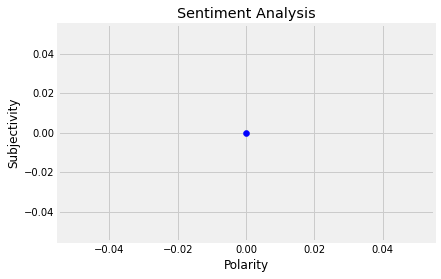

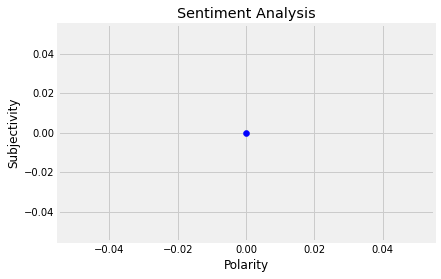

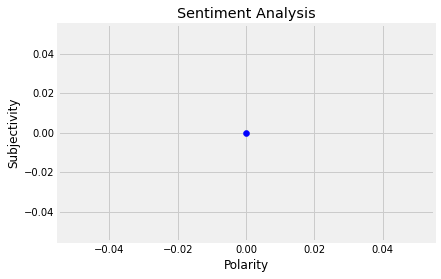

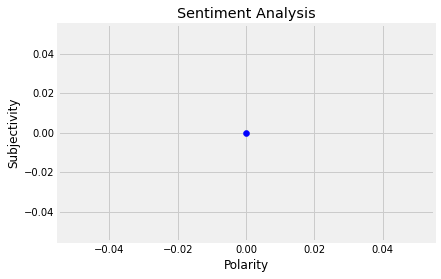

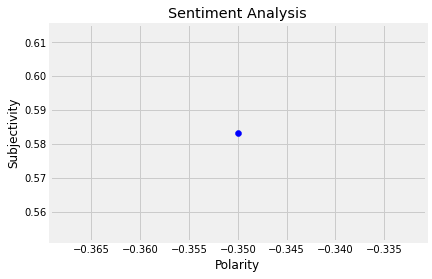

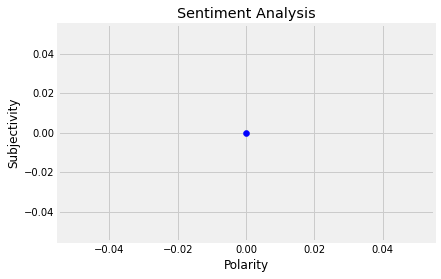

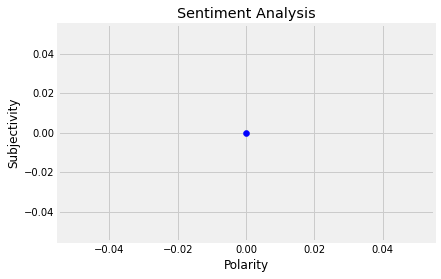

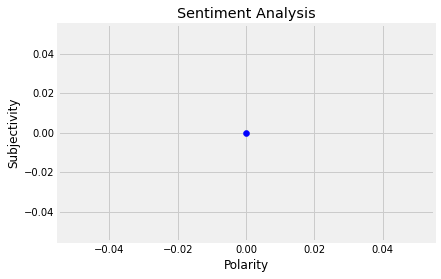

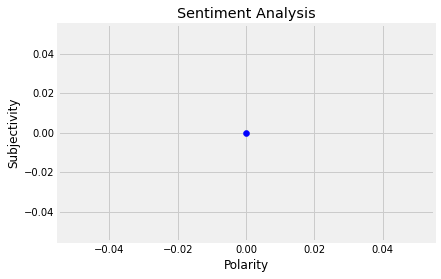

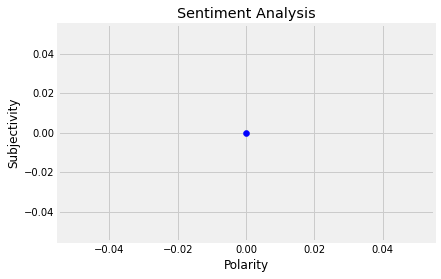

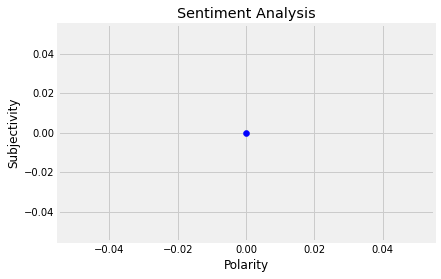

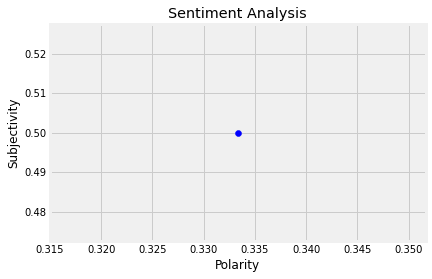

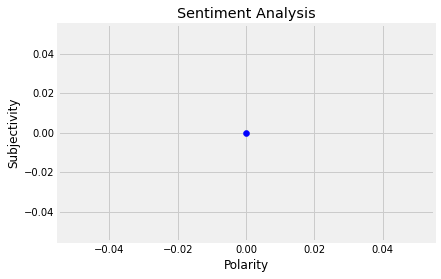

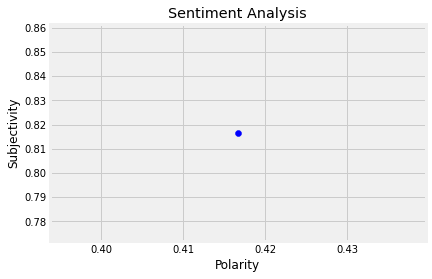

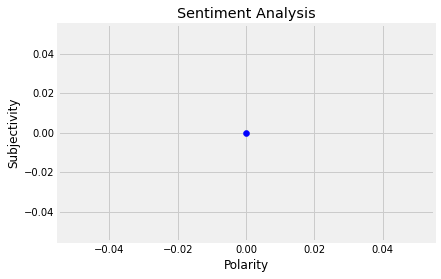

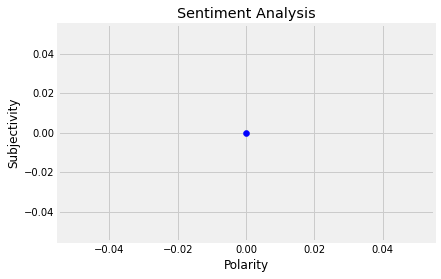

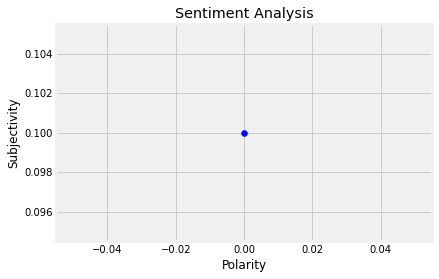

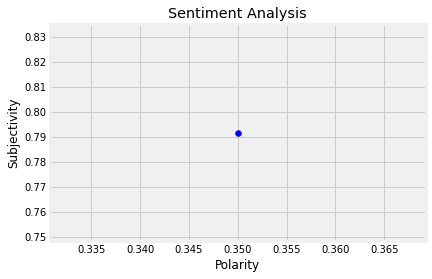

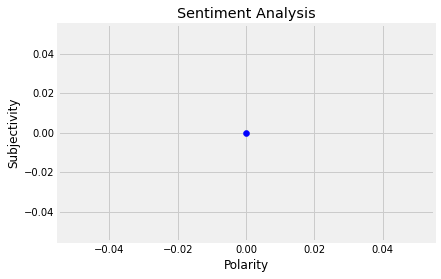

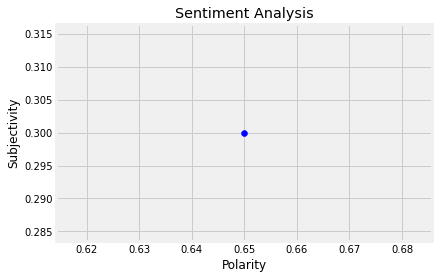

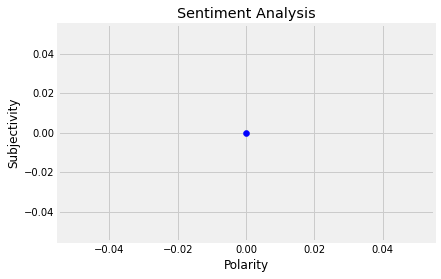

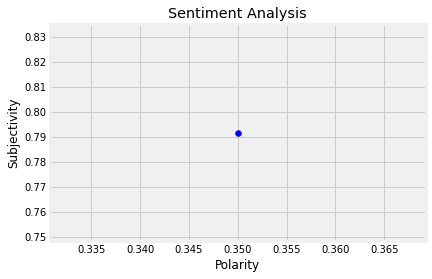

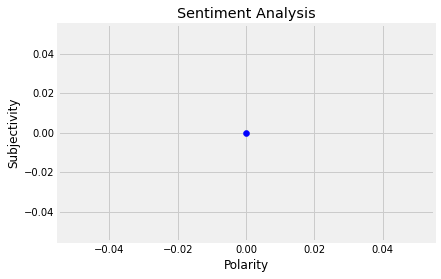

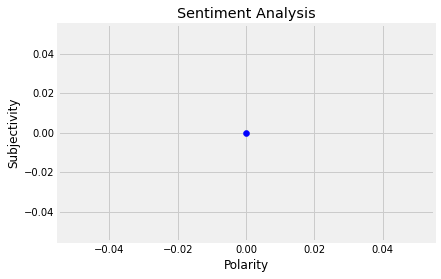

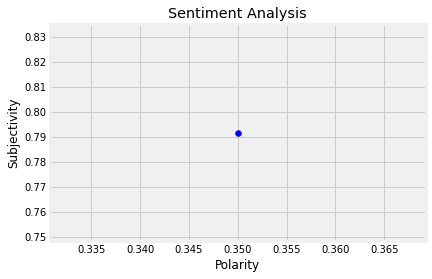

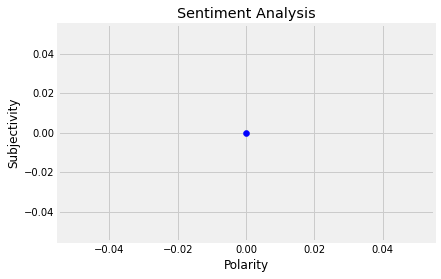

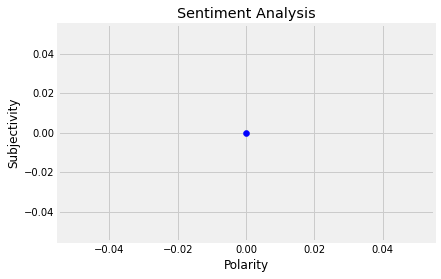

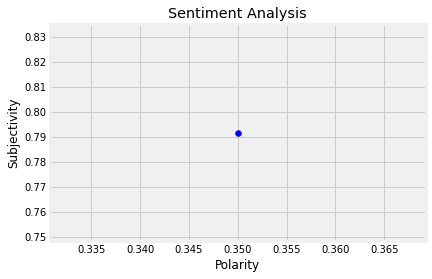

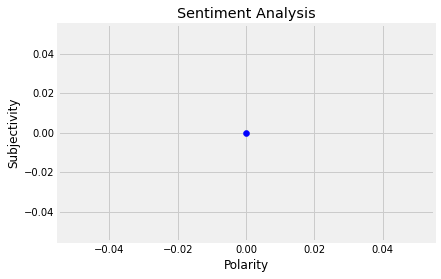

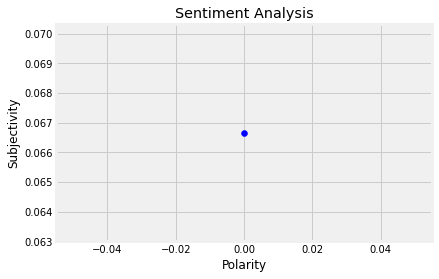

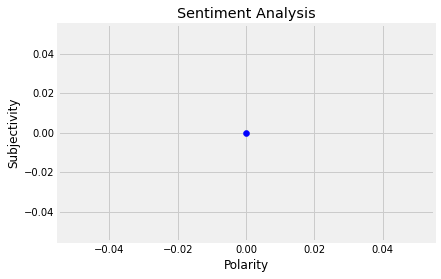

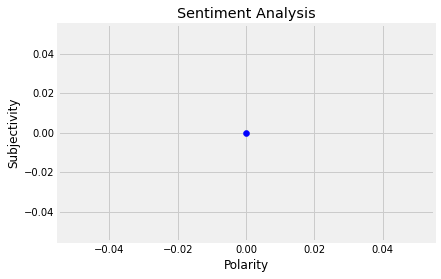

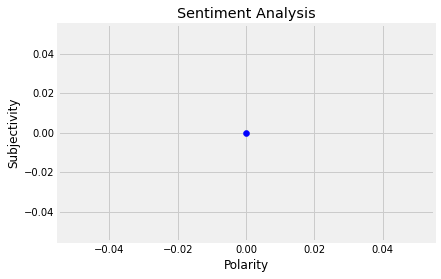

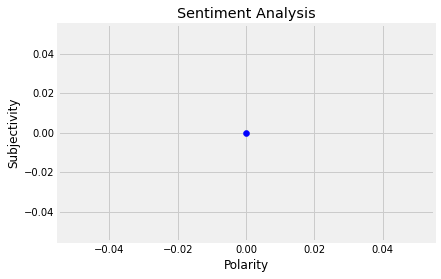

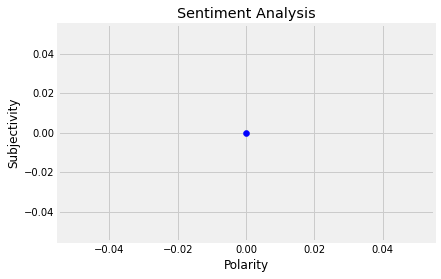

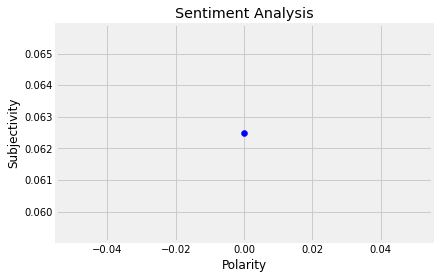

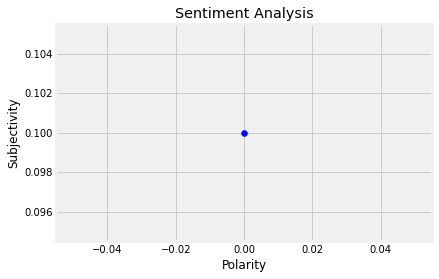

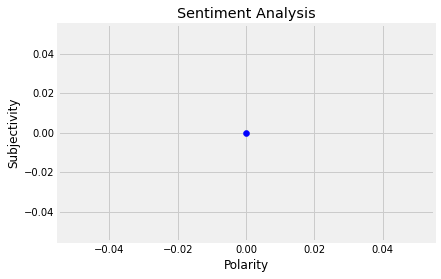

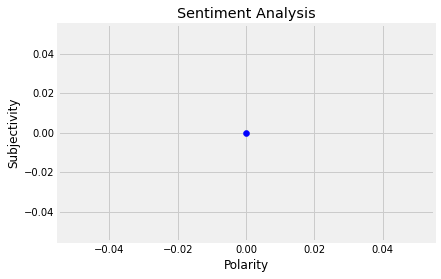

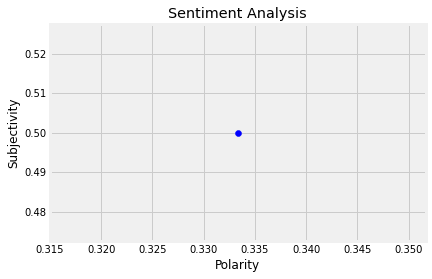

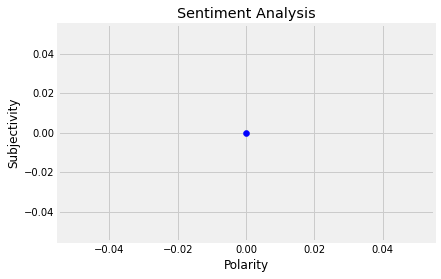

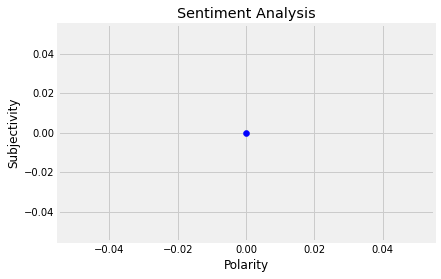

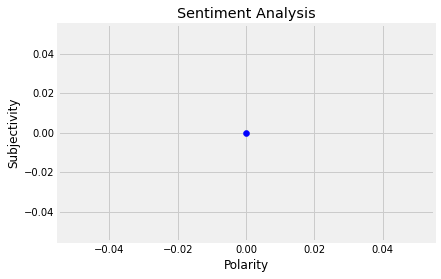

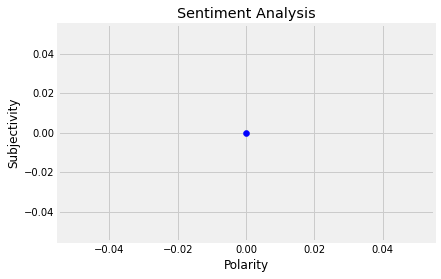

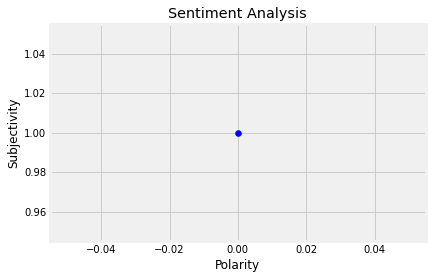

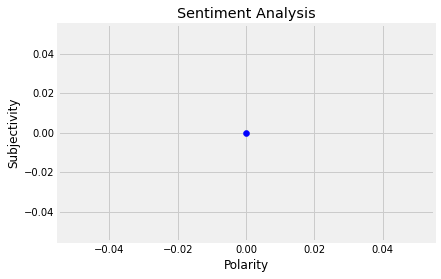

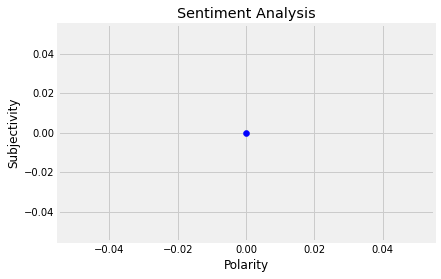

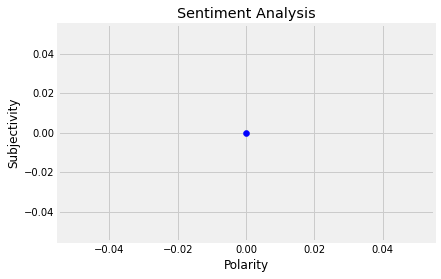

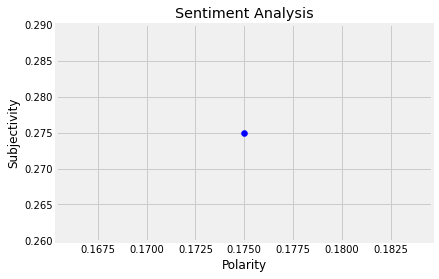

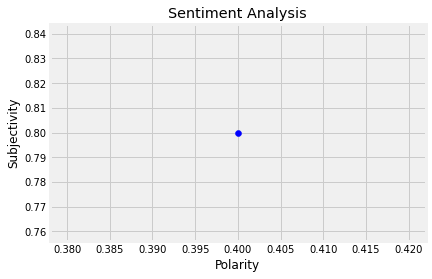

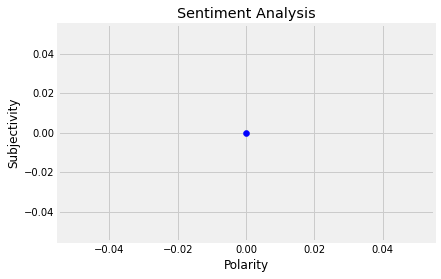

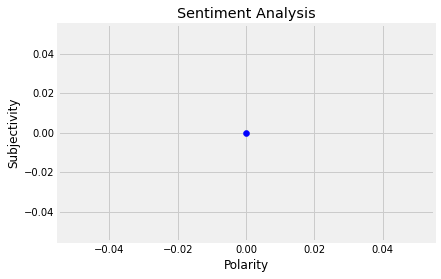

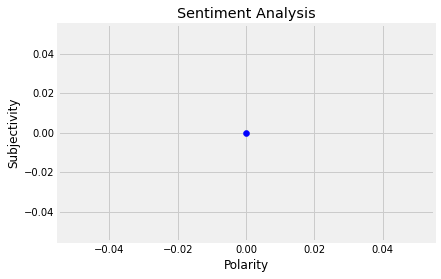

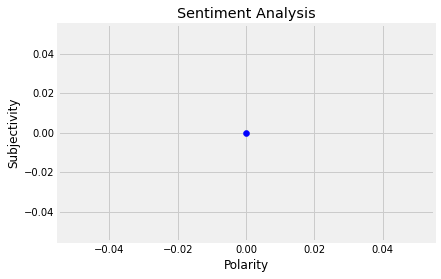

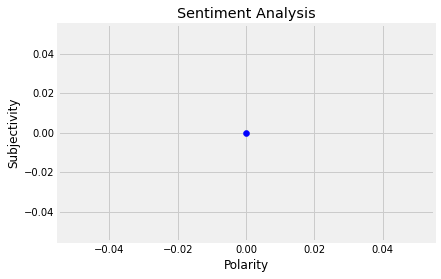

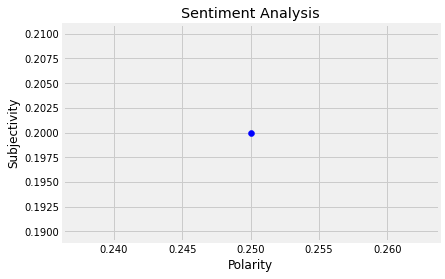

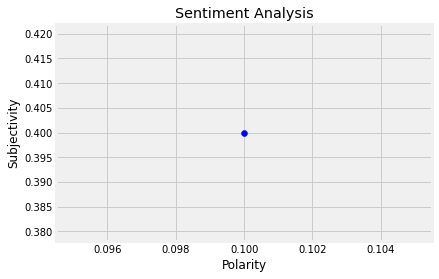

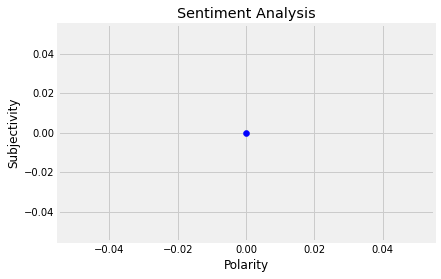

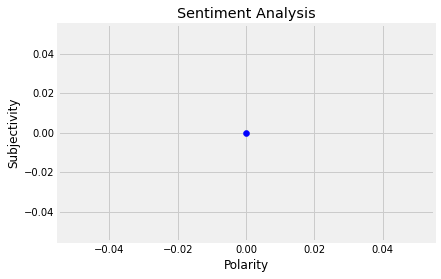

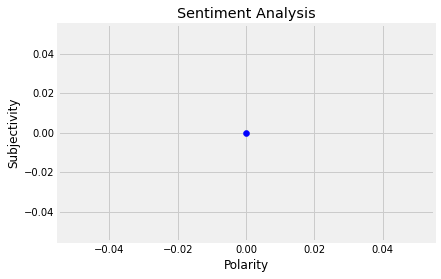

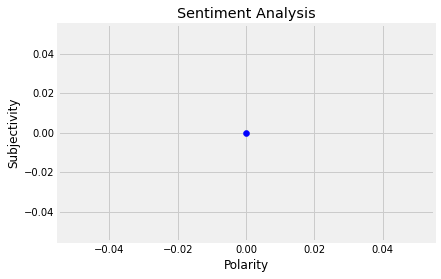

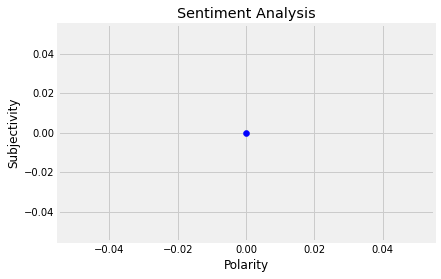

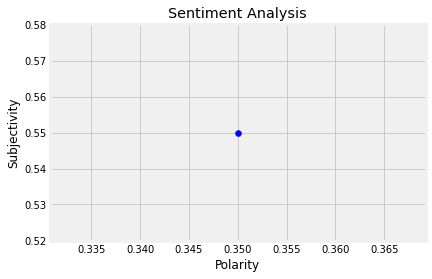

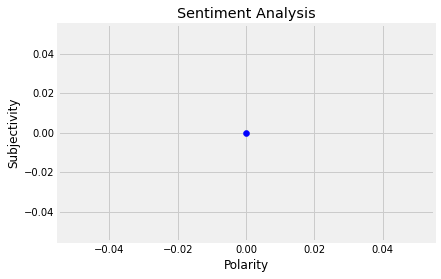

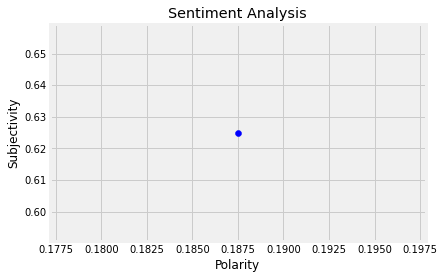

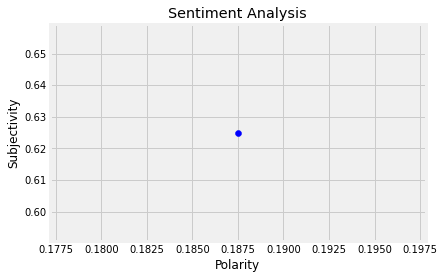

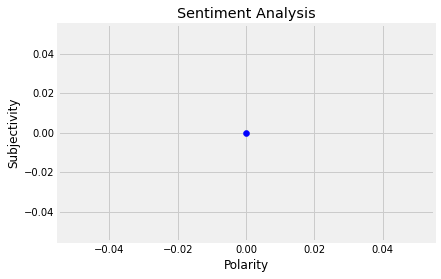

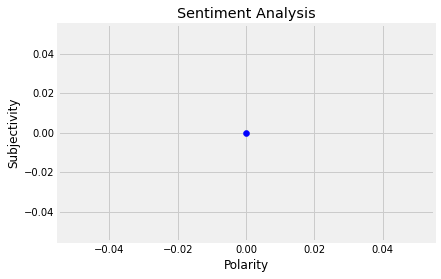

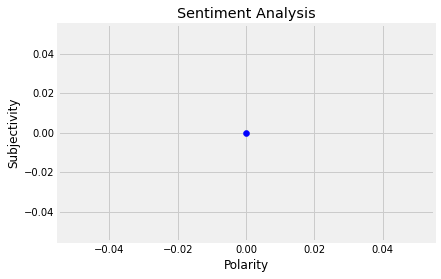

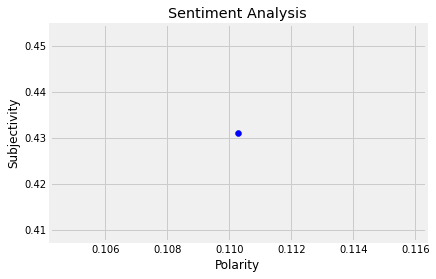

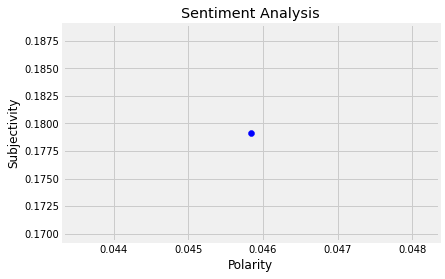

In [23]:
plt.figure(figsize=(8,6))
for i in range(0, sortedDF.shape[0] ):
  plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color='Blue')
  #plt.scatter(x,y,color)
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show()
  

In [24]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


22.0

In [26]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)

2.0

In [27]:
#show the value counts
df['Analysis'].value_counts()


Neutral     76
Positive    22
Negative     2
Name: Analysis, dtype: int64

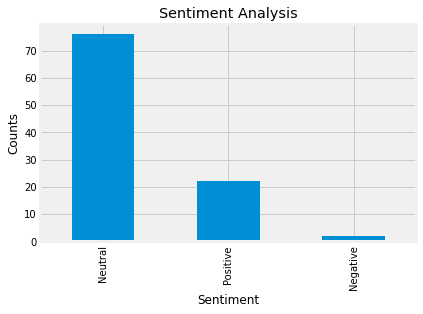

In [29]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

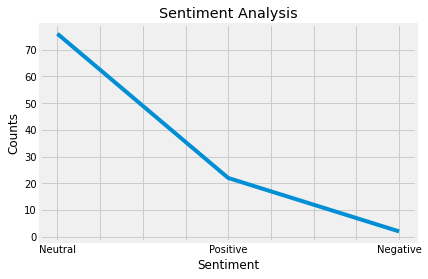

In [30]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()